In [77]:
import pandas as pd 
import numpy  as np

from tensorflow import keras

from matplotlib import pyplot as plt
from PIL import Image
from keras import layers
from keras.datasets import mnist

In [56]:
(X_train, _), (X_test, _) = mnist.load_data()

Ogni campione è un'immagine in scala di grigi, ovvero una matrice di valori di intensità luminosa nel range $[0, 255]$

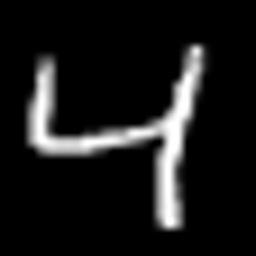

In [57]:
img = Image.fromarray(X_train[2], 'L')
display(img.resize((256, 256)))

Attraverso l'autoencoder vogliamo provare a ridurre la dimensionalità delle nostre immagini. L'immagine è formata da $28 \times 28$ pixel, ovvero 784 valori totali. Prima di tutto linearizziamo le nostre matrici, ovvero passiamo da un vettore bidimensionale ad un vettore unidimensionale: 

In [69]:
img = X_train[0]
dimension = np.prod(img.shape)
train_nsamples = len(X_train)
test_nsamples = len(X_test)

X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

X_train_unid = X_train.reshape(train_nsamples, dimension)
X_test_unid = X_test.reshape(test_nsamples, dimension)

In [70]:
X_test_unid.shape

(10000, 784)

Creiamo l'autoencoder:

In [71]:
encoding_dim = 32 # da 784 a 32 valori. 

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

Separatamente creiamo due modelli decoder ed encoder:

In [72]:
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim, ))

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Definiamo la funzione loss e l'algoritmo di ottimizzazione: 

In [74]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [75]:
X_train_unid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Alleniamo il nostro modello:

In [76]:
autoencoder.fit(X_train_unid, X_train_unid,
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(X_test_unid, X_test_unid))

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2808 - val_loss: 0.1899
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1709 - val_loss: 0.1538
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1444 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1285 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1182 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1110 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1057 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1020 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0992 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0974 - val_loss: 0.0953

Mostriamo le ricostruzioni che l'autoencoder riesce a costruire a partire dall'informazione compressa. 

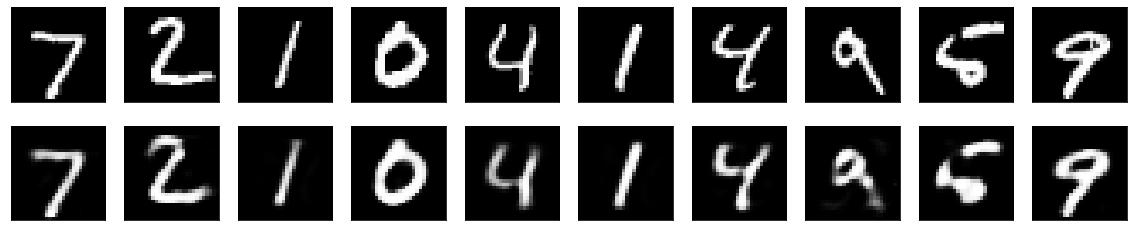

In [80]:
encoded_imgs = encoder.predict(X_test_unid)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
